Visualization Warmup

1. Copy the following code into a jupyter notebook named visualization_warmup.ipynb

    - import matplotlib as mpl
    - import matplotlib.pyplot as plt
    - import pandas as pd
    - import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv' 
df = pd.read_csv(url)

2. df contains (fake) data on students time at codeup:

    - ml_coffee: coffee consumption in milliliters
    - syntax_errors: number of syntax errors
    - p_days_absent: percentage of days absent

In [3]:
df

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544
...,...,...,...
95,12065,5.094917e+10,0.038186
96,10135,4.985129e+10,0.078423
97,4497,4.914074e+10,0.042588
98,17863,5.148034e+10,0.085831


3. Create a scatter plot of syntax_errors and ml_coffee. Make sure to give your visual an appropriate title and labels.

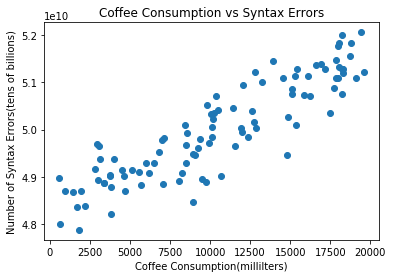

In [15]:
plt.scatter(data = df, x = 'ml_coffee', y = 'syntax_errors')
plt.xlabel('Coffee Consumption(millilters)')
plt.ylabel('Number of Syntax Errors(tens of billions)')
plt.title('Coffee Consumption vs Syntax Errors')
plt.show()

4. Create a scatter plot of p_days_absent and ml_coffee. Make sure to give your visual an appropriate title and labels.

In [13]:
df.p_days_absent = df.p_days_absent * 100

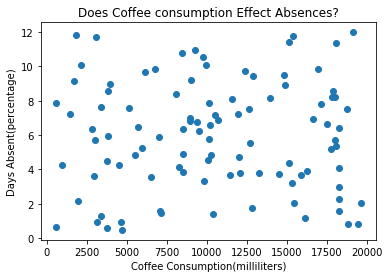

In [14]:
plt.scatter(data= df, x = 'ml_coffee', y = 'p_days_absent')
plt.xlabel('Coffee Consumption(milliliters)')
plt.ylabel('Days Absent(percentage)')
plt.title('Does Coffee consumption Effect Absences?')
plt.show()

5. Perform any other customizations you think will help to the plots you have created

In [16]:
import seaborn as sns

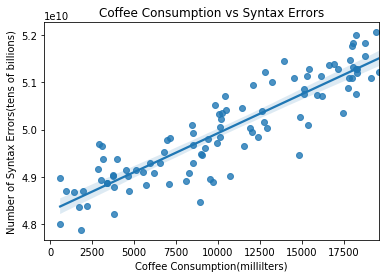

In [19]:
sns.regplot(data = df, x = 'ml_coffee', y = 'syntax_errors')
plt.xlabel('Coffee Consumption(millilters)')
plt.ylabel('Number of Syntax Errors(tens of billions)')
plt.title('Coffee Consumption vs Syntax Errors')
plt.show()